In [ ]:
#!pip install matplotlib
#!pip install sympy

In [1]:
from scipy.io import loadmat
import numpy as np
from numpy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pickle 

from scipy.optimize import fsolve
from math import exp
from numpy import sin, cos

# **The cart and pole system**

Consider the cart-and-pole system here depicted:
<div>
<img src="https://drive.google.com/uc?export=view&id=1Yu5zZ57OEEYZ678yWLaU7h-Wq3M9vV9E" width="200">
</div>
whose dynamics follows the following equations:

\begin{align}
  \ddot{\theta}&=\frac{g \sin(\theta)\,+\,\cos(\theta) \left[ \frac{-F\,-\,m_p\,l\,\dot{\theta}^2 \sin \left(\theta\right)}{m_c\,+\,m_p}\right]-\frac{\mu_p\dot{\theta}}{m_p\,l}}{l\,\left[\frac{4}{3}-\frac{m_p\,cos^2\left(\theta\right)}{m_c\,+\,m_p}\right]}
\end{align}
>>>>>>>>>>>>>>>>>>>>>>>>$(*)$

\begin{align}
  \ddot{p}_c&=\frac{F\,+\,m_p\,l\,\left[\dot{\theta}^2\,\sin\left(\theta\right)\,-\,\ddot{\theta}\,\cos(\theta)\right]}{m_c\,+\,m_p}
\end{align}

where $g = 9.8\,\text{m/sec}$ is the gravitational acceleration, $m_c = 1\,\text{kg}$ is the cart mass, $m_p = 0.1\,\text{kg}$ is the pole mass, $l = 0.5\,\text{m}$ is the half-pole length, $\mu_p = 0.000002$ is the pole on cart friction coefficient, and $F:|F|\leq 10\,\text{N}$ is the force applied to cart's center of mass.

# 1.   Clearly define the state vector $x$ and the control input vector $u$. Define also the domains to which they belong, $X$ and $U$ respectively.

The state vector  is:
$$
x = \left( \begin{array}{ccc}
                \theta \\
                \dot \theta \\
                p_c \\
                \dot p_c
\end{array} \right)
=
\left( \begin{array}{ccc}
                  x_1 \\
                  x_2 \\
                  x_3 \\
                  x_4
\end{array} \right)
$$

Where:
- $\theta \in [-\pi,\pi]$ is the angular position
- $\dot \theta$ is the angular velocity
- $p_c \in [-5,5]$ is the linear position 
- $\dot p_c$ is the linear velocity


The control input  is the force applied to the cart: $u = F$ with the constraint that $|F| < 10$.

# 2.   Compute the equilibrium state $\bar{x}$ when the control input $\bar{u}$ is set equal to $0$.



In [2]:
g = 9.8 # gravitational acceleration
mc = 1  # cart mass [kg]
l = 0.5 # half-pole length [m]
m = 0.1 # pole mass [kg]
miup = 2e-6 # pole friction coefficient

# let's set the input force to 0
F = 0 # N

In [3]:
def equations(vars):
    x1, x2, x3, x4 = vars
    d_x1 = x2
    d_x2 = (g*sin(x1)+ cos(x1)*((-F-m*l*(x2**2)*sin(x1))/(mc+m))-((miup*x2)/(m*l))) / (l*((4/3)-((m*(cos(x1)**2))/(mc+m))))

    d_x3 = x4
    d_x4 = (F+m*l*((x2**2)*sin(x1)-d_x2*cos(x1)))/(mc+m)

    return [d_x1, d_x2, d_x3, d_x4]

[
    fsolve(equations, (0, 0, 0, 0)),
    fsolve(equations, (3, 0, 0, 0)),
    fsolve(equations, (0, 0, 10, 0))
]

[array([0., 0., 0., 0.]),
 array([3.14159265e+00, 5.56038935e-25, 4.60220307e+03, 0.00000000e+00]),
 array([ 0.,  0., 10.,  0.])]

The equilibrium states are:

$$
x = \left( \begin{array}{ccc}
                \theta = k \pi \; \forall k \in \mathbb{N} \\
                \dot \theta =0 \\
                p_c \in \mathbb{R} \\
                \dot p_c =0
\end{array} \right)
$$

This makes sense, since the position doesn't affect the pole's stability (only the cart's velocity) and the pole has two stability points (straight up, which is unstable and straight down, which is stable).

# 3.   Given the sequence of control inputs $\left[u^{(0)},\,u^{(1)},\cdots,u^{(100)}\right]=\left[\right]$ simulate the behavior of the non linear system $(*)$



In [4]:
uvec = loadmat('U.mat')
uvec = uvec['U'][0]

The following function will describe the dynamic:

\begin{align}
  \ddot{\theta}&=\frac{g \sin(\theta)\,+\,\cos(\theta) \left[ \frac{-F\,-\,m_p\,l\,\dot{\theta}^2 \sin \left(\theta\right)}{m_c\,+\,m_p}\right]-\frac{\mu_p\dot{\theta}}{m_p\,l}}{l\,\left[\frac{4}{3}-\frac{m_p\,cos^2\left(\theta\right)}{m_c\,+\,m_p}\right]}
\end{align}

\begin{align}
  \ddot{p}_c&=\frac{F\,+\,m_p\,l\,\left[\dot{\theta}^2\,\sin\left(\theta\right)\,-\,\ddot{\theta}\,\cos(\theta)\right]}{m_c\,+\,m_p}
\end{align}

In [5]:
def cart_and_pole_odeint(x, t, F):
    dxdt = np.zeros_like(x)
    dxdt = equations(x)
    return dxdt

In [6]:
time_step=0.02
t0_odeint=0
x0_odeint = np.array([0.0, 0.0, 0.0, 0.0])
X_odeint=[x0_odeint]

To simulate the system the integral between two consecutive time instants is being calculated using the function odeint


In [7]:
for i in range(len(uvec)):
    t1_odeint = t0_odeint+0.02
    t_odeint = np.array([t0_odeint, t1_odeint])
    F = uvec[i]
    x_odeint = odeint(cart_and_pole_odeint, x0_odeint, t_odeint, args=(F, ))
    x0_odeint = x_odeint[1]
    X_odeint=np.append(X_odeint, [x0_odeint], axis= 0)

Text(0.5, 1.0, 'dot p_c(t)')

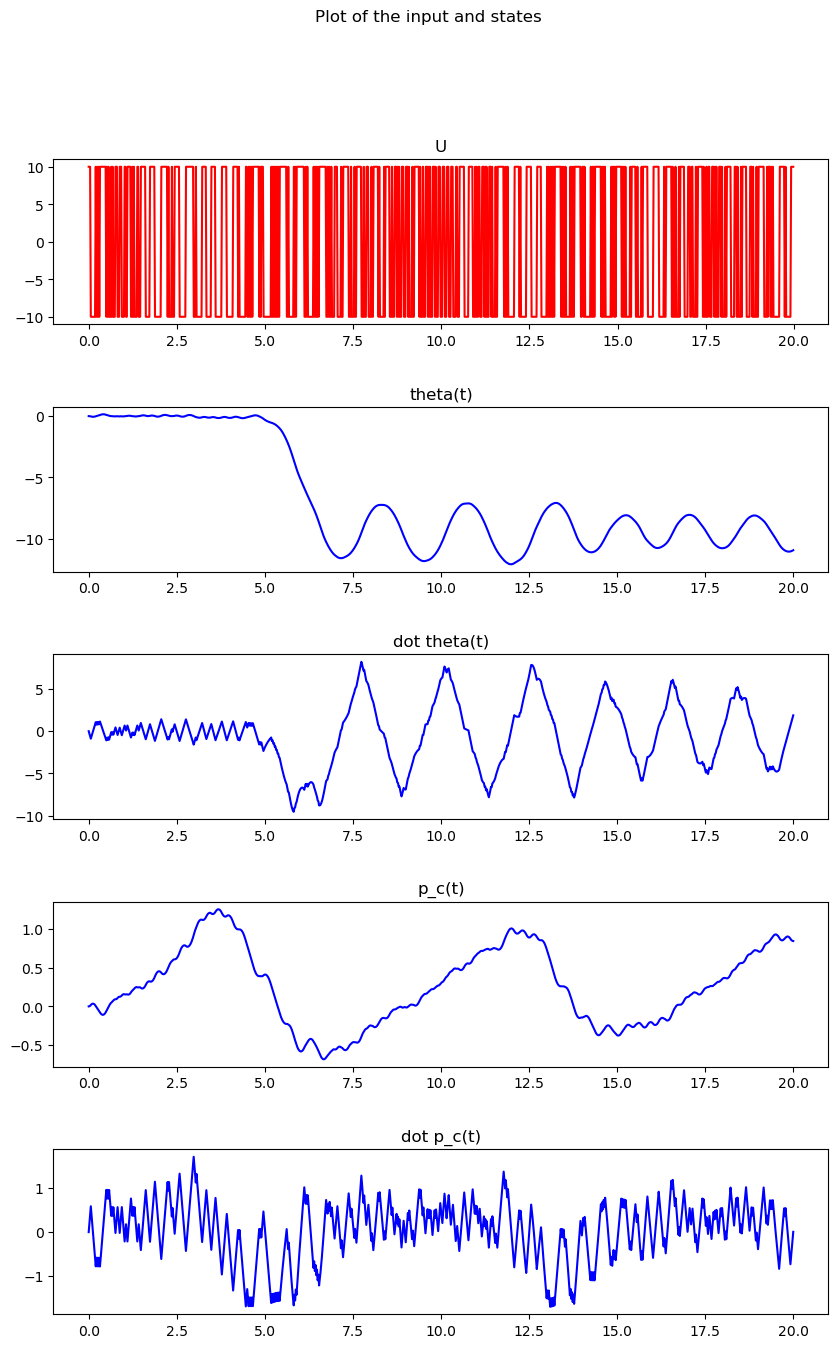

In [8]:
time_sim=np.arange(0.0, 20, time_step)

plt.rcParams['figure.figsize'] = [10, 15]
fig, axs = plt.subplots(5)
fig.subplots_adjust(hspace=0.5)

fig.suptitle("Plot of the input and states")

axs[0].plot(time_sim, uvec, 'r', label='U(t)')
axs[0].set_title("U")

axs[1].plot(np.arange(0.0, 20+time_step, time_step), X_odeint[:,0], 'b')
axs[1].set_title("theta(t)")

axs[2].plot(np.arange(0.0, 20+time_step, time_step), X_odeint[:,1], 'b')
axs[2].set_title("dot theta(t)")

axs[3].plot(np.arange(0.0, 20+time_step, time_step), X_odeint[:,2], 'b')
axs[3].set_title("p_c(t)")

axs[4].plot(np.arange(0.0, 20+time_step, time_step), X_odeint[:,3], 'b')
axs[4].set_title("dot p_c(t)")

# 4.   Given the non linear system (∗) linearize it around the equilibrium point computed in the point 2 and simulate the behavior of the linear systems given the same sequence of control inputs of point 3.

There are more equlibrium points, I will linearize around $(0,0,0,0)$.

To linearize the system, I will make use of symbolic calculation. I have to replace the variables on the state equation and then derive (Taylor's series) each of them and substitute all the variables that I already know, since I'm already at an equilibrium state.

In [9]:
import sympy as sym
from sympy import sin, cos

In [10]:
x1 = sym.Symbol("x1")
x2 = sym.Symbol("x2")
x3 = sym.Symbol("x3")
x4 = sym.Symbol("x4")
F = sym.Symbol("F")
x = [x1,x2,x3,x4]
xeq = [0,0,0,0]
ueq = 0

In [11]:
theta2p = ((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m))))
x2p = (F+(m*l*(((x[1]**2)*sin(x[0]))-((((g*sin(x[0]))+(cos(x[0])*((-F-(m*l*(x[1]**2)*sin(x[0])))/(mc+m)))-((miup*x[1])/(m*l)))/(l*((4/3)-((m*((cos(x[0]))**2))/(mc+m)))))*cos(x[0])))))/(mc+m)

I first linearize the components for the A matrix, then the B matrix.

In [12]:
theta2p_linA = []
for i in range(len(x)):
    lin = sym.diff(theta2p, x[i]) # evaluate the partial derivative
    lin = lin.subs(F, ueq)
    for j in range(len(x)):
        lin = lin.subs(x[j], xeq[j]) # replace equilibrium points
    theta2p_linA.append(lin)
print(theta2p_linA)

theta2p_linB = sym.diff(theta2p, F)
for j in range(len(x)):
    theta2p_linB = theta2p_linB.subs(x[j], xeq[j]) # replace equilibrium points
print(theta2p_linB)

[15.7756097560976, -6.43902439024390e-5, 0, 0]
-1.46341463414634


In [13]:
x2p_linA = []
for i in range(len(x)):
    lin = sym.diff(x2p, x[i]) # evaluate the partial derivative
    lin = lin.subs(F, ueq)
    for j in range(len(x)):
        lin = lin.subs(x[j], xeq[j]) # replace equilibrium points
    x2p_linA.append(lin)
print(x2p_linA)

x2p_linB = sym.diff(x2p, F)
for j in range(len(x)):
    x2p_linB = x2p_linB.subs(x[j], xeq[j]) # replace equilibrium points
print(x2p_linB)

[-0.717073170731708, 2.92682926829268e-6, 0, 0]
0.975609756097561


In [79]:
A = np.array([
    [0, 1, 0, 0],
    theta2p_linA,
    [0, 0, 0, 1],
    x2p_linA
])

B = np.array([
    0,
    theta2p_linB,
    0,
    x2p_linB
])

In [103]:
linearized_model = {
    "A": A,
    "B": B
}
with open('linearized_model.pkl', 'wb') as file: 
    pickle.dump(linearized_model, file) 

In [105]:
X_lin_history.shape

(1001, 4)

In [104]:
X_lin_history = [np.array([xeq]).T]
for U in uvec:
    input_vec = U*np.ones((4,1))
    X_lin = np.dot(A, X_lin_history[-1]) + np.dot(B, input_vec)
    X_lin_history = np.append(X_lin_history, [X_lin], axis=0)
X_lin_history = X_lin_history.reshape(X_lin_history.shape[0], X_lin_history.shape[1])

Text(0.5, 1.0, 'dot p_c(t)')

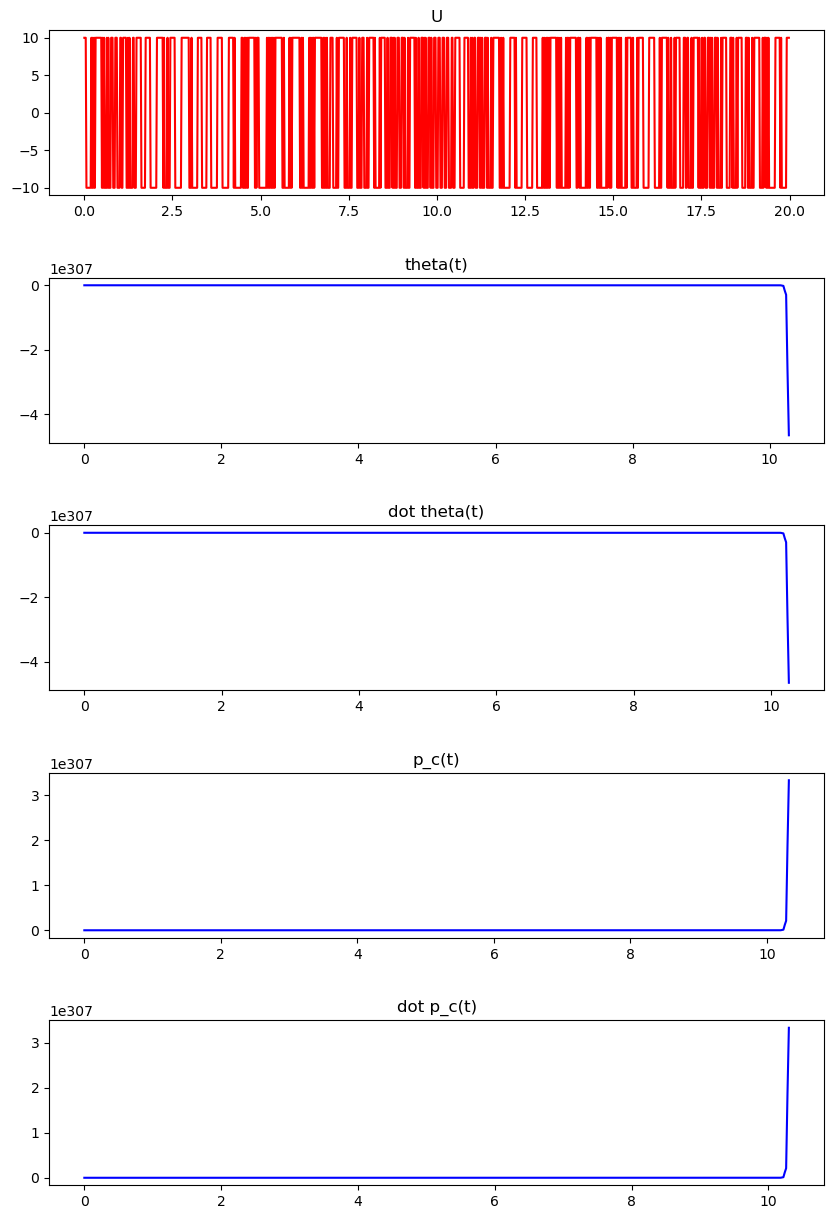

In [102]:
time_sim=np.arange(0.0, 20+time_step, time_step)

plt.rcParams['figure.figsize'] = [10, 15]
fig, axs = plt.subplots(5)
fig.subplots_adjust(hspace=0.5)

axs[0].plot(time_sim[:-1], uvec, 'r', label='U(t)')
axs[0].set_title("U")

axs[1].plot(time_sim, X_lin_history[:,0], 'b')
axs[1].set_title("theta(t)")

axs[2].plot(time_sim, X_lin_history[:,1], 'b')
axs[2].set_title("dot theta(t)")

axs[3].plot(time_sim, X_lin_history[:,2], 'b')
axs[3].set_title("p_c(t)")

axs[4].plot(time_sim, X_lin_history[:,3], 'b')
axs[4].set_title("dot p_c(t)")

# 5.   Comment the results obtained in point 3 and 4. Do you observe any difference?



The gotten results at the points 3 and 4 are profoundly different and the main reason is that in the second case we are using a linearised system far away from it's equilibrium point and this will lead to unavoidable errors as we are moving away from the equilibrium. 

Supplying a $F=\pm 10$ is not the best to stay close to $(0,0,0,0)$.